In [1]:
%matplotlib inline
import argparse
import csv
import logging
import os
import random
import sys
import pickle
import time
import numpy as np
from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from bert_util import *

In [2]:
mnli_processor = MnliProcessor()
hans_processor = HansProcessor()
train_examples = mnli_processor.get_train_examples('data/', 10000)
test_examples = hans_processor.get_test_examples('data/')

In [3]:
interested_test_idx = 7

for te in test_examples:
    if te.guid == interested_test_idx:
        print(te.guid)
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        break

7
The athlete by the doctors encouraged the senator . The athlete encouraged the senator . entailment


In [4]:
test_tok_sal_list, train_tok_sal_lists, test_pred_status = pickle.load(open("from_aws/NLI_influence_output_bert_e3/saliency_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [5]:
top_sal_ix = [_ix for _ix, _ in sorted(enumerate(test_tok_sal_list), key=lambda x: -x[1][1])][:3]
for ix, (tok, sal) in enumerate(test_tok_sal_list):
    if ix in top_sal_ix:
        print(colored(tok + '\t' + str(sal), "green"))
    else:
        print(tok + '\t' + str(sal))

[CLS]	0.004317282
the	-0.007485319
athlete	-0.14760923
by	-0.049165454
the	-0.050391756
doctors	-0.14886299
encouraged	-0.088029
the	-0.032777905
senator	-0.055137962
.	-0.01177289
[SEP]	0.003715336
the	0.01097851
athlete	-0.04906088
encouraged	0.08856703
the	-0.009075683
senator	-0.18473382
.	-0.022565214
[SEP]	0.035753675


In [6]:
orig_influences = pickle.load(open("from_aws/NLI_influence_output_bert_e3/influences_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [7]:
order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 10

train_idx_sorted = list(np.argsort(orig_influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["entailment", "non-entailment"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        print(orig_influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

One of the drawings on view at MoMA is a diagram of the races, with the Jews identified as circumscised [ sic ] cut off from Earth. Jews think of drawings on the MoMA as a diagram of the races teaching circumcision.  entailment
5.741442680358887

Two pillars surviving from the Greek Temple of Apollo stand like a gateway, but the Spanish era has given it a charming 17th-century ambience of Baroque houses with iron balconies supported by floral carvings and an occasional stone nymph. It's comprised of parts of the Greek Temple of Apollo and Spanish Baroque houses. entailment
5.344240665435791

because you're having fun Because you're having fun entailment
4.964197158813477

9. INVERSE PRICE CAPS 9 Inward caps on price.  entailment
4.923686981201172

I don't know if I was in heaven or hell, said Lillian Carter, the president's mother, after a visit. The president's mother visited. entailment
4.879209995269775

Do it now, think 'bout it later. Don't think about it now, just do it. entailme

In [8]:
diff_influences_list, mask_ix = pickle.load(open("from_aws/NLI_influence_output_bert_e3/diff_mask_influences_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [9]:
remove_token_type = 2

influences = diff_influences_list[remove_token_type]
print("w.r.t. token:", test_tok_sal_list[mask_ix[remove_token_type]][0])
print()

order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 10

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["entailment", "non-entailment"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        print(influences[idx])
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

w.r.t. token: encouraged

One of the drawings on view at MoMA is a diagram of the races, with the Jews identified as circumscised [ sic ] cut off from Earth. Jews think of drawings on the MoMA as a diagram of the races teaching circumcision.  entailment
18.779272079467773

Two pillars surviving from the Greek Temple of Apollo stand like a gateway, but the Spanish era has given it a charming 17th-century ambience of Baroque houses with iron balconies supported by floral carvings and an occasional stone nymph. It's comprised of parts of the Greek Temple of Apollo and Spanish Baroque houses. entailment
18.099933624267578

I don't know if I was in heaven or hell, said Lillian Carter, the president's mother, after a visit. The president's mother visited. entailment
16.18392562866211

9. INVERSE PRICE CAPS 9 Inward caps on price.  entailment
14.431646347045898

Do it now, think 'bout it later. Don't think about it now, just do it. entailment
12.819534301757812

because you're having fun Beca

In [59]:
tp = 0.001

idx_range = range(1, 31)
influence_distance_lists = ([], [], [], [], [])
for iti in idx_range:
    orig_inf = pickle.load(open("from_aws/NLI_influence_output_bert_e3/influences_test_" + str(iti) + ".pkl", "rb"))
    diff_inf_list, m_ix = pickle.load(open("from_aws/NLI_diff_influence_output_bert_e3/diff_mask_influences_test_" + str(iti) + ".pkl", "rb"))
    for i, influences in enumerate(diff_inf_list):
        influence_distance_lists[i].append(influence_distance(orig_inf, influences, top_percentage=tp))

In [60]:
np.mean(influence_distance_lists[0])

0.32999999999999996

In [61]:
np.mean(influence_distance_lists[1])

0.7933333333333332

In [62]:
np.mean(influence_distance_lists[2])

0.46

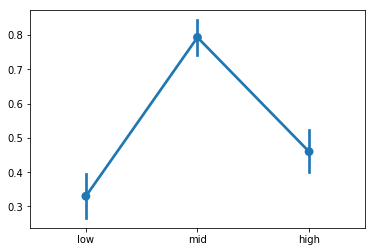

In [63]:
sns.pointplot(x=["low"]*len(idx_range)+["mid"]*len(idx_range)+["high"]*len(idx_range),
              y=influence_distance_lists[0]+influence_distance_lists[1]+influence_distance_lists[2], ci=68)